In [1]:
# Telco Customer Churn data to find out our target Churn

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\choco\OneDrive\Desktop\python\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
value=df['Churn'].value_counts()
value

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

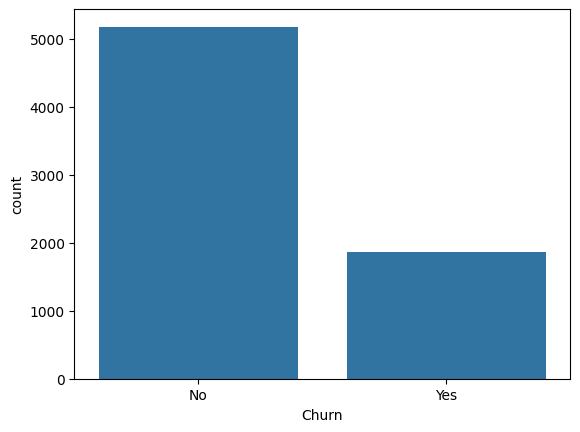

In [10]:
sns.barplot(value)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#df['Churn']=df['Churn'].replace('No',0)
#df['Churn']=df['Churn'].replace('Yes',1)
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0


In [14]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Partner','Dependents','StreamingTV','StreamingMovies','Contract','TotalCharges'])
df=encoder.fit_transform(df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,1,1,No,No phone service,DSL,No,...,No,No,1,1,1,Yes,Electronic check,29.85,1,0
1,5575-GNVDE,Male,0,2,1,34,Yes,No,DSL,Yes,...,Yes,No,1,1,2,No,Mailed check,56.95,2,0
2,3668-QPYBK,Male,0,2,1,2,Yes,No,DSL,Yes,...,No,No,1,1,1,Yes,Mailed check,53.85,3,1
3,7795-CFOCW,Male,0,2,1,45,No,No phone service,DSL,Yes,...,Yes,Yes,1,1,2,No,Bank transfer (automatic),42.30,4,0
4,9237-HQITU,Female,0,2,1,2,Yes,No,Fiber optic,No,...,No,No,1,1,1,Yes,Electronic check,70.70,5,1


In [15]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [72]:
x=df[['tenure','StreamingTV','StreamingMovies','Contract','MonthlyCharges']]
y=df['Churn']
x.head(2)

,tenure,StreamingTV,StreamingMovies,Contract,MonthlyCharges
0,1,1,1,1,29.85
1,34,1,1,2,56.95


In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

In [163]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5634, 5), (1409, 5), (5634,), (1409,))

In [164]:
x_train.dtypes

tenure               int64
StreamingTV          int64
StreamingMovies      int64
Contract             int64
MonthlyCharges     float64
dtype: object

In [165]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [166]:
y_pred=model.predict(x_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [167]:
y_test[:5]

1826    0
2342    0
6901    0
972     0
4281    0
Name: Churn, dtype: int64

In [168]:
model.score(x_test,y_test)

0.7885024840312278

In [169]:
model.score(x_train,y_train)

0.7870074547390842

In [170]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.7885024840312278

In [171]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[929, 110],
       [188, 182]])

<Axes: >

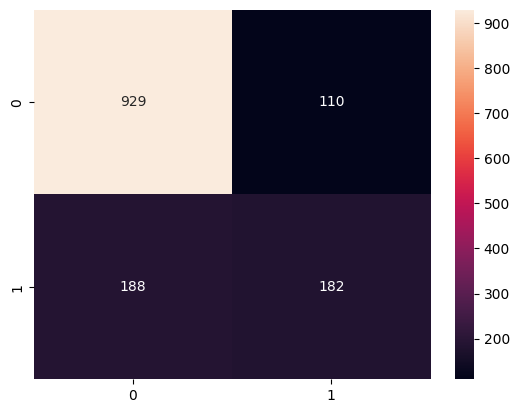

In [172]:
sns.heatmap(cm,annot=True,fmt='d')

In [173]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred)

0.6232876712328768

In [174]:
recall_score(y_test,y_pred)

0.4918918918918919

In [175]:
f1_score(y_test,y_pred)

0.5498489425981873

In [176]:
y_prob=model.predict_proba(x_test)
y_prob[:5]

array([[0.77763103, 0.22236897],
       [0.4156391 , 0.5843609 ],
       [0.84788305, 0.15211695],
       [0.97454996, 0.02545004],
       [0.90936853, 0.09063147]])

In [177]:
y_pred[:5]

array([0, 1, 0, 0, 0])

In [178]:
model.coef_

array([[-0.03445337, -0.05158452,  0.02206203, -0.99447623,  0.02783061]])

In [179]:
model.intercept_

array([-0.53335282])